In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("pap_smear_old.csv")
df

,Unnamed: 0,Cyto_A,CytoShort,KerneShort,CytoLong,KerneLong,CytoRund,K/C,Kerne_Ycol,CytoPeri,Cyto_Ycol,Kerne_A,KernePeri,KerneMax,KerneMin,target
0,0,606.96,22.12,10.90,42.11,15.03,0.4358,0.167350,0.60,226.30,0.75,121.99,61.88,53,37,0
1,1,440.56,18.29,8.96,35.82,13.36,0.4372,0.166774,0.52,190.69,0.75,88.18,48.49,43,24,0
2,2,234.47,12.82,7.20,37.63,15.44,0.2108,0.228844,0.57,156.50,0.77,69.58,63.94,34,19,0
3,3,366.92,15.17,6.99,37.26,12.62,0.3365,0.088941,0.54,171.47,0.76,35.82,69.66,19,11,0
4,4,277.87,12.57,7.19,35.48,11.53,0.2811,0.142615,0.54,147.28,0.73,46.22,65.29,20,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,201.65,16.49,11.37,39.50,21.08,0.1646,0.468825,0.61,155.62,0.88,177.98,66.47,50,36,1
496,496,63.56,18.24,16.56,33.07,25.80,0.0740,0.835050,0.63,114.71,0.84,321.77,81.22,86,60,1
497,497,220.81,17.68,9.89,39.39,23.22,0.1812,0.424044,0.53,182.46,0.76,162.57,84.71,63,50,1
498,498,430.36,32.93,16.86,38.95,21.71,0.3612,0.391322,0.49,232.68,0.82,276.68,74.46,76,55,1


In [3]:
df.columns

Index(['Unnamed: 0', 'Cyto_A', 'CytoShort', 'KerneShort', 'CytoLong',
       'KerneLong', 'CytoRund', 'K/C', 'Kerne_Ycol', 'CytoPeri', 'Cyto_Ycol',
       'Kerne_A', 'KernePeri', 'KerneMax', 'KerneMin', 'target'],
      dtype='object')

In [4]:
df.shape

(500, 16)

## Let's start train some models

In [5]:
## SVM
X = df.drop(columns=["target","Unnamed: 0"])
Y = df.target
print(X.shape)
print(Y.shape)

(500, 14)
(500,)


In [6]:
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)

In [7]:
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [8]:
pipeline_svm=Pipeline([('scalar1',Normalizer()),
                     ('SVM',SVC(kernel='linear', C=100, gamma="auto"))])

In [10]:
pipeline_svm.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scalar1', Normalizer(copy=True, norm='l2')),
                ('SVM',
                 SVC(C=100, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [11]:
## Prediction
y_pred = pipeline_svm.predict(X_train)

In [12]:
## Evaluation 
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))

Accuracy: 0.88


In [13]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeline_svm, X_train, y_train, cv=10, scoring="accuracy")
scores

array([0.9  , 0.9  , 0.875, 0.925, 0.875, 0.95 , 0.825, 0.825, 0.8  ,
       0.875])

In [14]:
from sklearn.metrics import f1_score
f1_score(y_train, y_pred, average=None)

array([0.8490566 , 0.90041494])

In [15]:
from sklearn.decomposition import PCA
pipeline_svm_pca=Pipeline([('scalar1',Normalizer()),('pca1',PCA(n_components=3)),
                     ('SVM',SVC(kernel='linear', C=100, gamma="auto"))])

In [16]:
pipeline_svm_pca.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scalar1', Normalizer(copy=True, norm='l2')),
                ('pca1',
                 PCA(copy=True, iterated_power='auto', n_components=3,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('SVM',
                 SVC(C=100, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [17]:
## Prediction
y_pred = pipeline_svm_pca.predict(X_train)

In [18]:
## Evaluation 
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))

Accuracy: 0.845


In [19]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeline_svm_pca, X_train, y_train, cv=10, scoring="accuracy")
scores

array([0.9  , 0.9  , 0.825, 0.85 , 0.85 , 0.95 , 0.825, 0.75 , 0.8  ,
       0.8  ])

In [20]:
from sklearn.metrics import f1_score
f1_score(y_train, y_pred, average=None)

array([0.80128205, 0.87295082])

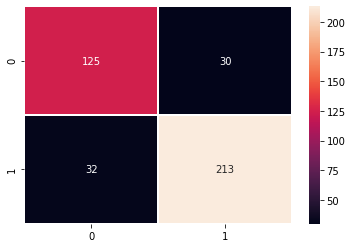

In [21]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
cf_matrix = confusion_matrix(y_train, y_pred)
sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='g')

In [22]:
## Optimaze the model
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(SVC(gamma='auto'), {
        'C': [1,10,20,100],
        'kernel': ['rbf','linear','poly']
    }, 
    cv=5, 
    return_train_score=False, 
    n_iter=10
) 

In [23]:
rs.fit(X_train, y_train)
pd.DataFrame(rs.cv_results_)[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,poly,0.9125
1,100,rbf,0.6125
2,20,poly,0.9125
3,1,linear,0.9400
4,100,linear,0.9500
5,20,rbf,0.6125
6,10,linear,0.9575
7,1,rbf,0.6125
8,20,linear,0.9525
9,100,poly,0.9125


In [58]:
pipeline_svm_3=Pipeline([('scalar2',Normalizer()),
                     ('SVM3',SVC(kernel='linear', C=10, gamma="auto"))])

In [59]:
pipeline_svm_3.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scalar2', Normalizer(copy=True, norm='l2')),
                ('SVM3',
                 SVC(C=10, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [60]:
y_pred = pipeline_svm_3.predict(X_train)

In [61]:
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))

Accuracy: 0.8525


In [62]:
scores = cross_val_score(pipeline_svm_3, X_train, y_train, cv=10, scoring="accuracy")
scores

array([0.9  , 0.925, 0.825, 0.875, 0.85 , 0.925, 0.825, 0.725, 0.8  ,
       0.825])

In [122]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

In [126]:
X = preprocessing.normalize(X)

In [127]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)

In [128]:
clf = DecisionTreeClassifier(random_state=10)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [129]:
y_pred = clf.predict(X_train)

In [130]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred)

1.0

[Text(250.90625, 520.95, 'X[0] <= 0.994\ngini = 0.389\nsamples = 733\nvalue = [194, 539]'),
 Text(238.50625, 475.65000000000003, 'X[8] <= 0.077\ngini = 0.221\nsamples = 617\nvalue = [78, 539]'),
 Text(55.800000000000004, 430.35, 'X[5] <= 0.0\ngini = 0.066\nsamples = 411\nvalue = [14, 397]'),
 Text(43.4, 385.05, 'gini = 0.0\nsamples = 240\nvalue = [0, 240]'),
 Text(68.2, 385.05, 'X[10] <= 0.464\ngini = 0.15\nsamples = 171\nvalue = [14, 157]'),
 Text(55.800000000000004, 339.75, 'X[3] <= 0.021\ngini = 0.366\nsamples = 58\nvalue = [14, 44]'),
 Text(24.8, 294.45, 'X[0] <= 0.884\ngini = 0.124\nsamples = 30\nvalue = [2, 28]'),
 Text(12.4, 249.14999999999998, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(37.2, 249.14999999999998, 'X[5] <= 0.0\ngini = 0.067\nsamples = 29\nvalue = [1, 28]'),
 Text(24.8, 203.84999999999997, 'X[2] <= 0.005\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(12.4, 158.55, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(37.2, 158.55, 'gini = 0.0\nsamples = 1\nva

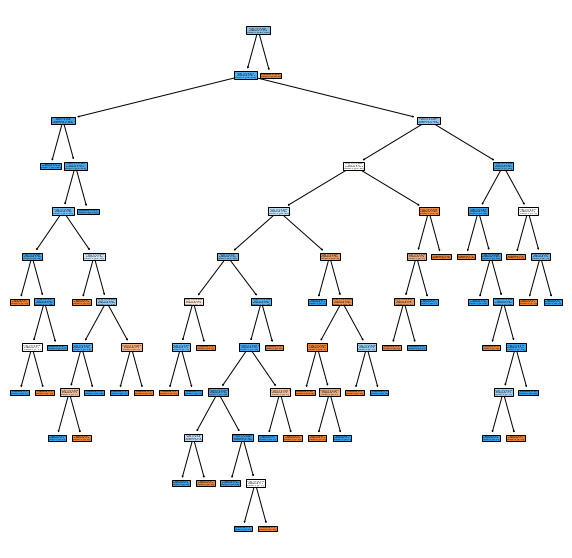

In [131]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(clf,filled=True)

In [132]:
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring="accuracy")
scores

array([0.86486486, 0.91891892, 0.90540541, 0.89041096, 0.89041096,
       0.84931507, 0.84931507, 0.94520548, 0.94520548, 0.87671233])

In [133]:
## pruning the tree

In [134]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [135]:
ccp_alphas

array([0.        , 0.00129245, 0.00130741, 0.00131721, 0.00133098,
       0.00137186, 0.00166083, 0.00181901, 0.00181901, 0.00181901,
       0.00218281, 0.00218281, 0.0024588 , 0.00249487, 0.00257137,
       0.00277976, 0.0028422 , 0.00295589, 0.00327422, 0.00388055,
       0.00389788, 0.00393995, 0.00401436, 0.00432026, 0.0046139 ,
       0.00462952, 0.01695369, 0.02632117, 0.02864874, 0.2033164 ])

In [136]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2033163956174928


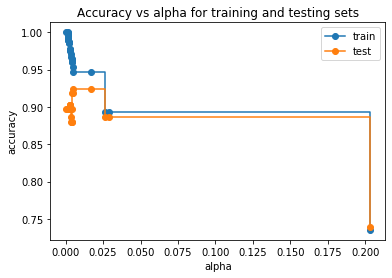

In [137]:
## Accuracy vs alpha for training and testing sets

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [73]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.035)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.035, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [74]:
pred=clf.predict(X_train)
from sklearn.metrics import accuracy_score
accuracy_score(y_train, pred)

0.9125

In [75]:
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring="accuracy")
scores

array([0.925, 0.95 , 0.875, 0.95 , 0.9  , 0.925, 0.825, 0.775, 0.9  ,
       0.875])

In [76]:
f1_score(y_train, pred, average=None)

array([0.87972509, 0.93123772])

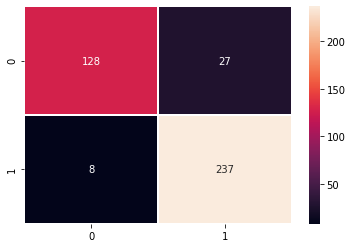

In [77]:
cf_matrix = confusion_matrix(y_train, pred)
sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='g')

[Text(418.5, 611.55, 'X[4] <= 14.21\ngini = 0.475\nsamples = 400\nvalue = [155, 245]'),
 Text(209.25, 203.85000000000002, 'gini = 0.111\nsamples = 136\nvalue = [128, 8]'),
 Text(627.75, 203.85000000000002, 'gini = 0.184\nsamples = 264\nvalue = [27, 237]')]

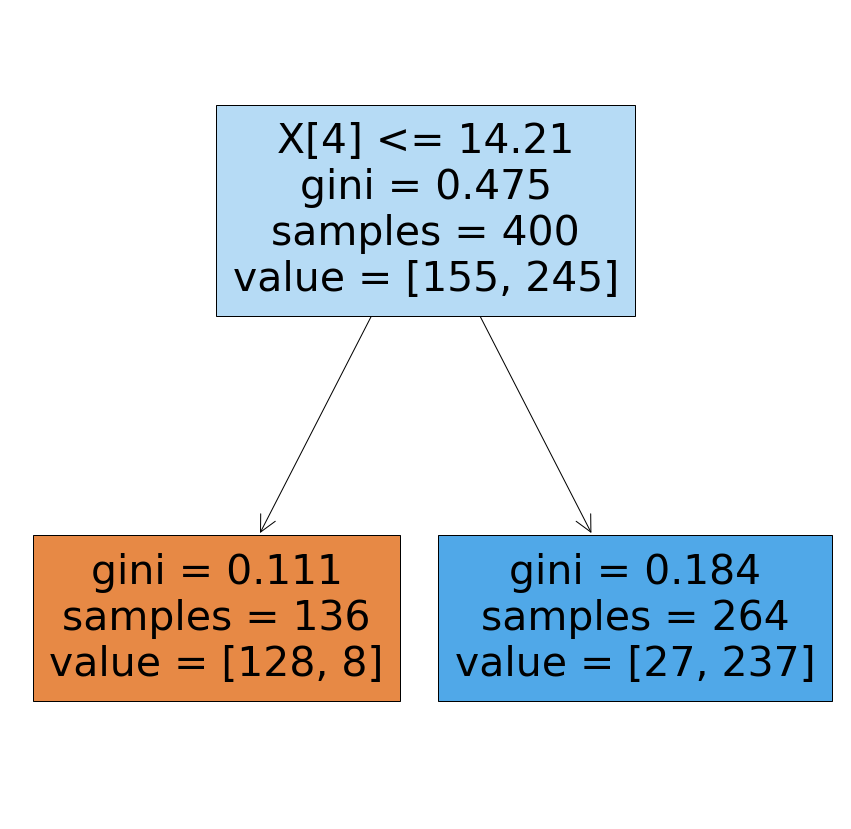

In [79]:
plt.figure(figsize=(15,15))
tree.plot_tree(clf,filled=True)

In [ ]:
## optimaze the model

In [80]:
## Logistic regression 
from sklearn.linear_model import LogisticRegression

In [81]:
pipeline_lr=Pipeline([('scalar2',Normalizer()),
                     ('LR',LogisticRegression(C=1, solver='liblinear'))])

In [82]:
## Fit the model
pipeline_lr.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('scalar2', Normalizer(copy=True, norm='l2')),
                ('LR',
                 LogisticRegression(C=1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='liblinear', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [83]:
## Predictions
y_pred = pipeline_lr.predict(X_train)

In [84]:
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))

Accuracy: 0.83


In [85]:
f1_score(y_train, y_pred, average=None)

array([0.76223776, 0.86770428])

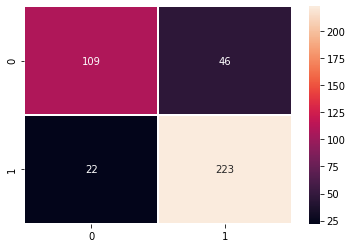

In [86]:
cf_matrix = confusion_matrix(y_train, y_pred)
sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='g')

In [87]:
## K-NN
from sklearn.neighbors import KNeighborsClassifier
K=3
pipeline_KNN=Pipeline([('scalar4',Normalizer()),
                     ('pca2',PCA(n_components=3)),
                     ('KNN',KNeighborsClassifier(n_neighbors = K))])

In [88]:
pipeline_KNN.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('scalar4', Normalizer(copy=True, norm='l2')),
                ('pca2',
                 PCA(copy=True, iterated_power='auto', n_components=3,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('KNN',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=3, p=2,
                                      weights='uniform'))],
         verbose=False)

In [89]:
y_pred = pipeline_KNN.predict(X_train)

In [90]:
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))

Accuracy: 0.9275


In [91]:
scores = cross_val_score(pipeline_KNN, X_train, y_train, cv=10, scoring="accuracy")
scores

array([0.85 , 0.825, 0.775, 0.875, 0.825, 0.9  , 0.775, 0.775, 0.75 ,
       0.95 ])

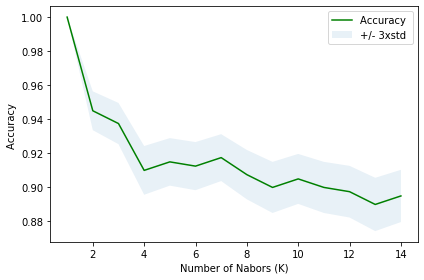

In [92]:
## The KNN model with K=2 is overfitting let's try some other K in order to make it more complicated
## Try 15 different K
import numpy as np
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_train)
    mean_acc[n-1] = metrics.accuracy_score(y_train, yhat)

    
    std_acc[n-1]=np.std(yhat==y_train)/np.sqrt(yhat.shape[0])

mean_acc
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [93]:
## Let's examine a model with K=7 neighbora
K=13
pipeline_KNN_2=Pipeline([('scalar5',Normalizer()),
                     ('pca5',PCA(n_components=3)),
                     ('KNN',KNeighborsClassifier(n_neighbors = K))])

In [94]:
pipeline_KNN_2.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('scalar5', Normalizer(copy=True, norm='l2')),
                ('pca5',
                 PCA(copy=True, iterated_power='auto', n_components=3,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('KNN',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=13, p=2,
                                      weights='uniform'))],
         verbose=False)

In [95]:
y_pred = pipeline_KNN_2.predict(X_train)

In [96]:
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))

Accuracy: 0.87


In [97]:
scores = cross_val_score(pipeline_KNN_2, X_train, y_train, cv=10, scoring="accuracy")
scores

array([0.9  , 0.925, 0.825, 0.825, 0.825, 0.925, 0.775, 0.725, 0.875,
       0.875])

In [98]:
f1_score(y_train, y_pred, average=None)

array([0.82894737, 0.89516129])

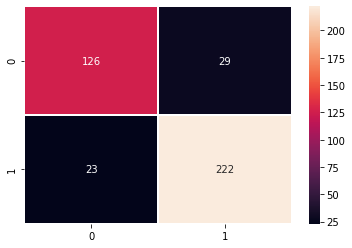

In [99]:
cf_matrix = confusion_matrix(y_train, y_pred)
sns.heatmap(cf_matrix, linewidths=1, annot=True, fmt='g')

### Despite the results, the model that performs better is the Decision tree, let’s now try to use this model in order to predict the test set 

In [100]:
y_pred = clf.predict(X_test)

In [101]:
## The model performs extremely well
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.93


In [111]:
## I will save the model and I will try to predict the target group of the big dataset

## Save the model
import pickle

with open("pap_smear_classification_pred.pkl", "wb") as f:
     pickle.dump(clf,f)

In [112]:
## Load the model
with open("pap_smear_classification_pred.pkl", "rb") as f:
    loaded_decision_tree = pickle.load(f)

In [113]:
df = pd.read_csv("data_cancer_new_2.csv")
df.shape

(917, 22)

In [114]:
df.columns

Index(['ID', 'Kerne_A', 'Cyto_A', 'K/C', 'Kerne_Ycol', 'Cyto_Ycol',
       'KerneShort', 'KerneLong', 'KerneElong', 'KerneRund', 'CytoShort',
       'CytoLong', 'CytoElong', 'CytoRund', 'KernePeri', 'CytoPeri',
       'KernePos', 'KerneMax', 'KerneMin', 'CytoMax', 'CytoMin', 'Class'],
      dtype='object')

In [115]:
df = df[["Cyto_A","CytoShort","KerneShort"
,"CytoLong","KerneLong","CytoRund","K/C","Kerne_Ycol","CytoPeri"
,"Cyto_Ycol","Kerne_A","KernePeri","KerneMax","KerneMin","Class"]]

In [116]:
z = [1,2,3]
def target(x):
    if x in z:
        return 0
    else:
        return 1

In [117]:
df["target"] = df["Class"].apply(lambda x: target(x))

In [118]:
df.target.value_counts()

1    675
0    242
Name: target, dtype: int64

In [119]:
df.columns

Index(['Cyto_A', 'CytoShort', 'KerneShort', 'CytoLong', 'KerneLong',
       'CytoRund', 'K/C', 'Kerne_Ycol', 'CytoPeri', 'Cyto_Ycol', 'Kerne_A',
       'KernePeri', 'KerneMax', 'KerneMin', 'Class', 'target'],
      dtype='object')

In [120]:
X = df.drop(columns=["Class","target"])
Y = df.target
print(X.shape)
print(Y.shape)

(917, 14)
(917,)


In [121]:
result = loaded_decision_tree.score(X, Y)
print(result)

0.7360959651035986
